**KORELASI**

In [1]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/hands-on-exploratory-data-analysis-with-python/master/Chapter%207/automobile.csv?authuser=0')
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [4]:
df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [7]:
#calculate  mean , median and mode of dataset
mean= df['height'].mean()
median = df['height'].median()
mode= df['height'].mode()
print(mean)
print(median)
print(mode)

53.72487804878049
54.1
0    50.8
Name: height, dtype: float64


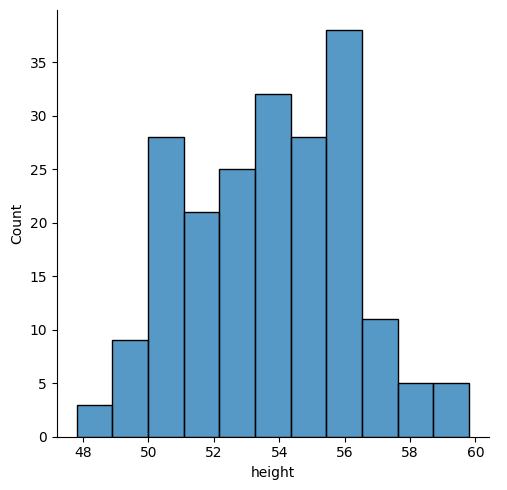

In [6]:
#distribution plot
#sns.FacetGrid(df,size=5).map(sns.distplot, "height").add_legend()
g= sns.FacetGrid(df, height=5)
g.map(sns.histplot, "height").add_legend()
plt.show()

In [10]:
print(df['price'].dtypes)

object


CLEANING DATA PRICE

In [11]:
#Find out the number of values which are not numeric
df['price'].str.isnumeric().value_counts()

,count
price,
True,201
False,4


In [12]:
#List out the values which are not numeric
df['price'].loc[df['price'].str.isnumeric() == False]

,price
9,?
44,?
45,?
129,?


In [13]:
#Setting the missing value to mean of price and convert the data types
price = df['price'].loc[df['price'] !='?']
pmean = price.astype(int).mean()
df['price'] = df['price'].replace('?', pmean).astype(int)
df['price'].head()

,price
0,13495
1,16500
2,16500
3,13950
4,17450


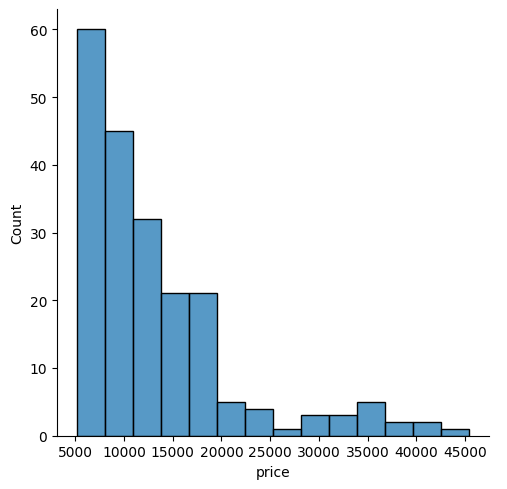

In [14]:
g = sns.FacetGrid(df, height=5)
g.map(sns.histplot, "price").add_legend()
plt.show()

lingkaran diluar boxplot merupakan outlier

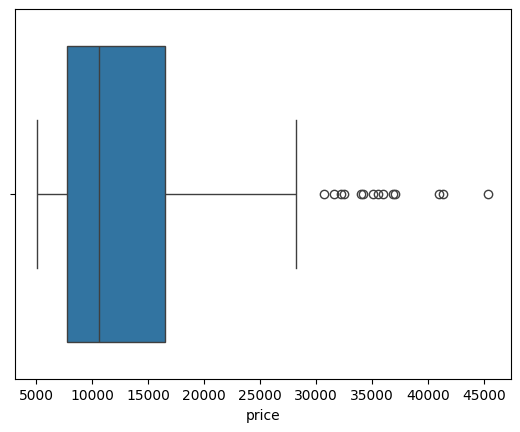

In [15]:
#boxplot for price of cars
sns.boxplot(x="price", data=df)
plt.show()

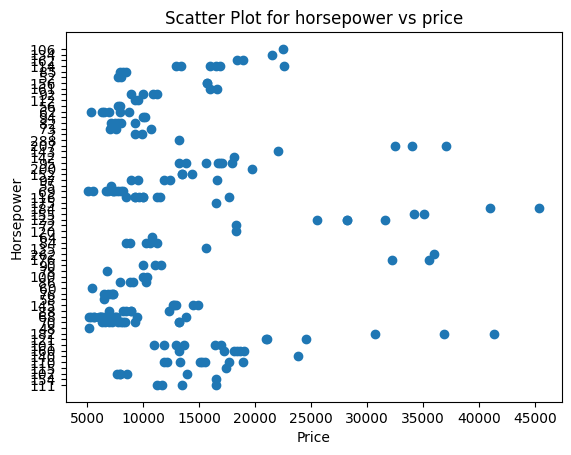

In [16]:
#plot the relationship between "horsepower" and "price"
plt.scatter(df["price"], df["horsepower"])
plt.title("Scatter Plot for horsepower vs price")
plt.xlabel(("Price"))
plt.ylabel("Horsepower")
plt.show()

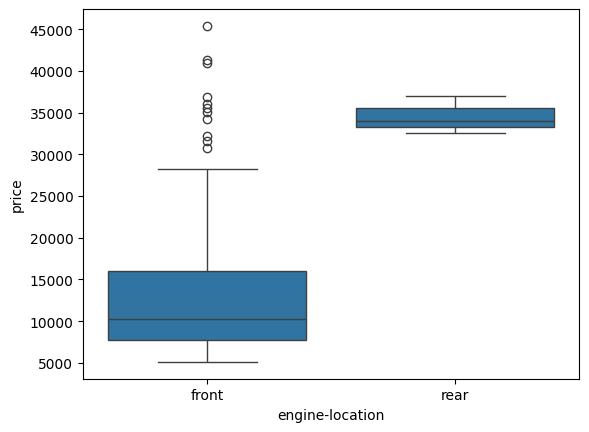

In [18]:
#boxplot
sns.boxplot(x="engine-location", y="price", data=df)
plt.show()

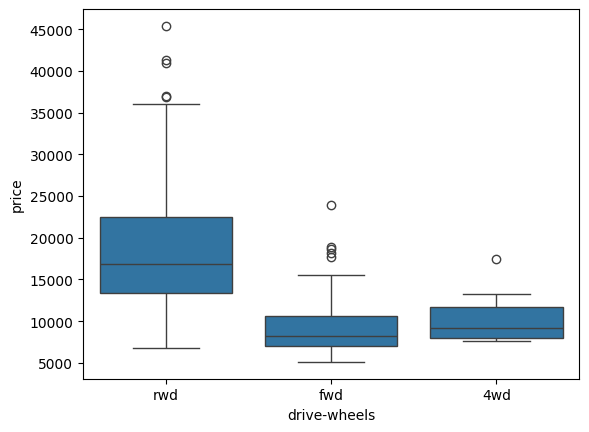

In [19]:
#boxplot to visualize the distribution of "price" with types of "drive-wheels"
sns.boxplot(x="drive-wheels", y="price", data=df)
plt.show()


In [24]:
nm = df['normalized-losses'].loc[df['normalized-losses'] !='?'].count()
nmmean = nm.astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?', nmmean).astype(int)
df['normalized-losses'].head()

,normalized-losses
0,122
1,122
2,122
3,164
4,164


In [23]:
hp= df['horsepower'].loc[df['horsepower'] !='?']
hpmean = hp.astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?', hpmean).astype(int)
df['horsepower'].head()

,horsepower
0,111
1,111
2,154
3,102
4,115


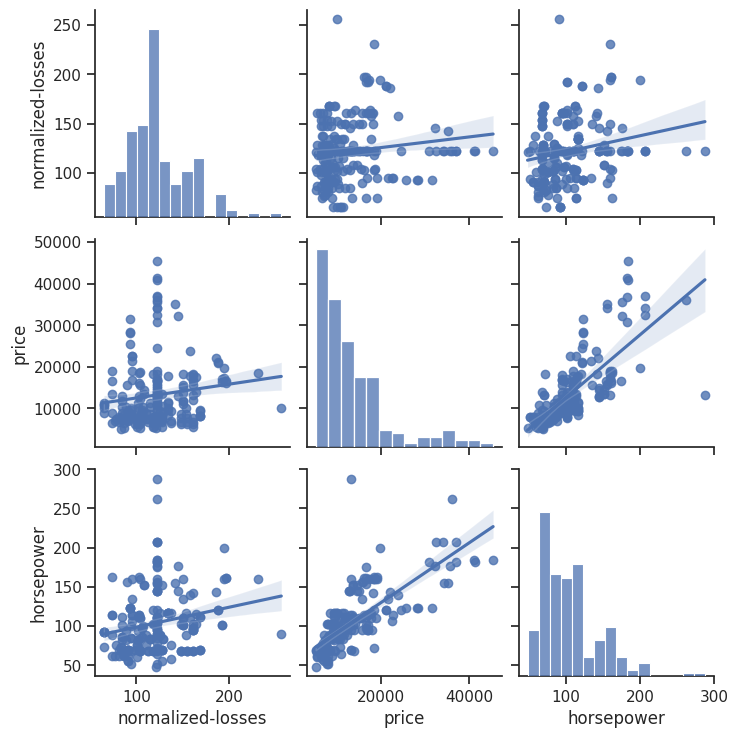

In [28]:
#pair plot with plot type regression
sns.pairplot(df, vars=["normalized-losses", 'price', 'horsepower'], kind="reg")
plt.show()

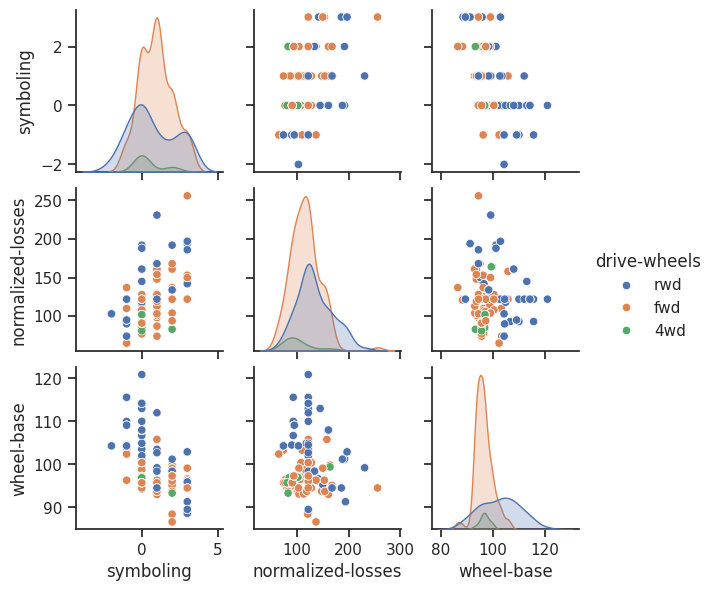

In [25]:
#pair plot (matrix scatterplot) of few columns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, height=2, vars=['symboling', 'normalized-losses', 'wheel-base'], hue="drive-wheels")
plt.show()

Membaca p value dari belakang, untuk melihat minus.
Jika dinilai kurang dari signifikasi 5% maka hasil nya tolan H0. Dua berkorelasi

In [26]:
from scipy import stats
corr= stats.pearsonr(df["price"], df["horsepower"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 1.5910332446595894e-39
cor:		 0.757945621793524
